In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
import scipy as sp
from scipy import fftpack, signal
import time

## Prise en main de la transformée de Fourier discrète

### Du monde continu au monde discret pour la transformée de Fourier

Dans le cours, on opère avec des signaux continus $x:\mathbb{R} \rightarrow \mathbb{R}, t \mapsto x(t)$ dont la transformée de Fourier est également continue $$X = \mathcal{F}(x) :\mathbb{R} \rightarrow \mathbb{C}, \nu \mapsto X(\nu) = \displaystyle \int_{\mathbb{R}} x(t) e^{-i 2 \pi \nu t} dt \quad (1)$$

Bien entenu, lorsqu'on manipule réellement un signal sur un ordinateur, celui-ci est discret et fini. Le signal $x$ est un vecteur de $N$ points : $x = \big[x[0],\dots,x[N-1]\big]$. Il en va de même pour sa transformée de Fourier, qui doit également être finie et discrète : on parle alors de transformée de Fourier discrète (quelle surprise !), ou TFD (DFT pour _Discrete Fourier Transform_ en anglais).

Qu'est ce que ça change en pratique ? Pas mal de choses, malheureusement. Et sans forcément aller très loin dans les détails, il faut quand même prendre le temps d'expliciter un certain nombre de points nécessaires à une bonne (ou en tout cas, un début de) compréhension de la TFD.

Par défaut, la TFD $X$ d'un signal $x$ se calcule également sur $N$ points (bien qu'il soit aussi possible de la calculer sur $M > N$ points, comme on le verra par la suite). Ainsi, $X$ est également un vecteur de longueur $N$ : $X = \big[X[0],\dots,X[N-1]\big]$, dont chaque composante $X[k]$ s'otbient par la formule de la TFD :
$$X[k] = \displaystyle \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi \frac{nk}{N}} \quad k = 0,\dots,N-1 \quad (2)$$

On peut se convaincre sans trop de peine que $(2)$ est bien une version discrétisée de $(1)$ pour un signal de longueur finie.

La transformée de Fourier discrète inverse (IDFT pour _Inverse Discrete Fourier Transform_ en anglais), permet de retrouver $x$ à partir de $X$ grâce à la formule :

$$x[n] = \displaystyle \frac{1}{N}\sum_{k=0}^{N-1} X[k] e^{i 2 \pi \frac{nk}{N}} \quad n = 0,\dots,N-1 \quad (3),$$ 

qui ressemble aussi pas mal à l'écriture du théorème de Dirichlet (modulo le fait que le signal $x$ est discret et fini et qu'il ne contient que des harmoniques jusqu'à l'ordre $N-1$)

Et c'est tout ?

Non, bien sûr que non, ça serait trop simple sinon... Faisons donc un petit tour d'horizon des choses à garder en tête lorsque l'on manipule une TFD.

#### Discrétisation de l'axe des temps

L'écriture $x = \big[x[n]\big], n = 0, \dots, N-1$ ne veut pas dire que le signal $x$ a été échantillonné pour des valeurs entières de la variable $t$ $(x[n] \neq x(t=n))$, mais qu'on a défini $N$ points de mesure $t_n, n=0,\dots,N-1$ sur l'axe des "temps" (ou peu importe ce que représente la variable $t$) et que c'est en ces points là que $x$ est évalué/échantillonné. 

Ainsi, $x[n]$ est à comprendre au sens $x[t_n]$ : c'est le $(n+1)^\text{ème}$ échantillon du signal discret $x$, et non la valeur de $x$ en $t=n$. Bien que les points de mesure $t_n$ puissent être définit un peu comme on veut, on les prendra en pratique régulièrement espacés dans le temps, avec un pas de temps de $T_e$ : $t_n = t_0 + n T_e$. $T_e$ s'appelle la **période d'échantillonnage**, et $f_e = \frac{1}{T_e}$ est la **fréquence d'échantillonnage**.

In [2]:
tmin = -5
tmax = 5
Te = 0.01 # période d'échantillonnage de l'axe des temps
fe = 1/Te # fréquence d'échantillonnage de l'axe des temps
t = np.arange(tmin,tmax,Te) # vecteur temps discret entre tmin (inclus) et tmax (exclus) avec pas de Te
N = t.size # nombre total de points entre tmin et tmax

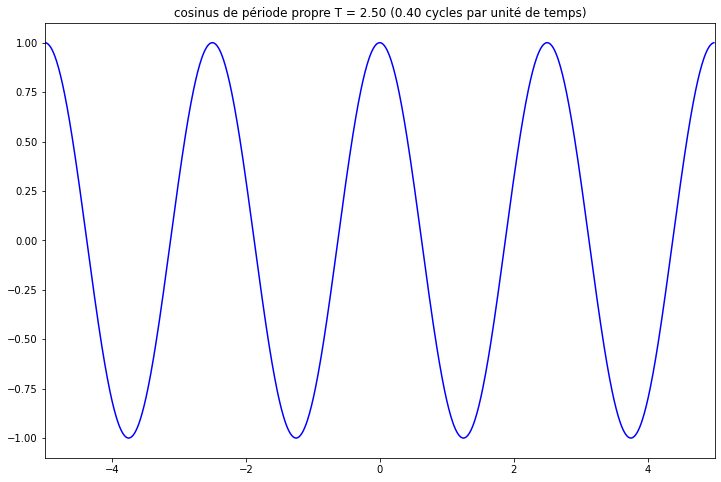

In [3]:
# Définition d'un signal cosinus pur
A = 1
T = 2.5 # période du signal
F = 1/T # fréquence fondamentale
x = A*np.cos(2*pi*t/T)

plt.figure(figsize=(12,8))
plt.title('cosinus de période propre T = %1.2f (%1.2f cycles par unité de temps)'%(T,F))
plt.plot(t,x,'b')
plt.xlim(tmin,tmax)
plt.show()

<font color="blue"> **Question** Jouez avec la cellule précédente en faisant varier $A$ et $T$, en prenant garde à définir $T$ pour afficher **un nombre entier de périodes** sur toute la durée du signal pour le moment (par exemple, $T = 0.1$, $T=1$, $T=2.5$, etc, mais pas $T=3$, $T = 2\pi$, etc...). D'après le cours, quelle devrait être la transformée de Fourier des différents cosinus que vous définissez ?  </font>

<font color="blue"> **Question** Calculez la TFD $X$ du signal $x$ grâce à `sp.fftpack.fft` (un petit coup d'œil à la [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html) ne fera pas de mal) et affichez le spectre (c'est-à-dire le module $ \vert X \vert$ de $X$ grâce à `np.abs`). Est-ce conforme à ce que vous attendiez ?</font>

/nix/store/grrssgsx42d7gj6xaj3qxskhszfqcjwg-python3.9-matplotlib-3.5.2/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


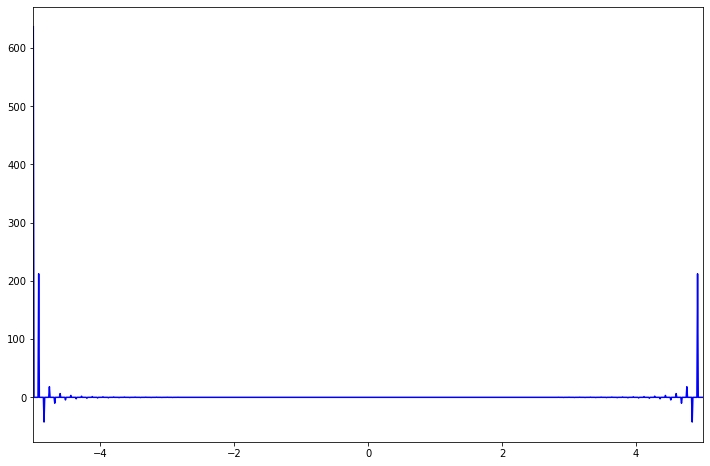

In [4]:
res = sp.fftpack.fft(np.abs(x))
plt.figure(figsize=(12,8))
plt.plot(t,res,'b')
plt.xlim(tmin,tmax)
plt.show()

#### Discrétisation de l'axe des fréquences

Tout comme l'axe des temps a été discrétisé en $N$ points de mesure, il en va de même avec l'axe des fréquences. Ainsi, $X[k]$ est à comprendre au sens $X[\nu_k]$. Les $\{ \nu_k, k=0,\dots,N-1 \}$ s'appellent les **fréquences discrètes**, et il y a plusieurs choses à savoir à leur propos :

1) ces fréquences discrètes $\nu_k$ sont forcément comprises entre $ -\frac{f_e}{2}$ et $\frac{f_e}{2}$. Cette propriété est à admettre pour le moment, puisque c'est une conséquence du théorème de Shannon, qui sera vu plus tard dans le cours. 

2) Puisque la TFD se calcule par défaut sur $N$ points, il y a donc $N$ fréquences discrètes couvrant un intervalle $[-\frac{f_e}{2},\frac{fe}{2}]$ (donc de largeur $f_e$). Ainsi, le pas d'échantillonnage en fréquence est $\frac{fe}{N}$. 

3) L'échantillonnage en fréquence varie donc selon que $N$ est pair ou impair :

\begin{align}
\nu &= \frac{f_e}{N} [ -\frac{N}{2},-\frac{N}{2}+1,\dots,\frac{N}{2}-1] = [-\frac{fe}{2},-\frac{fe}{2}+\frac{f_e}{N},\dots,\frac{f_e}{2}-\frac{f_e}{N}]\quad &\text{si }N \text{ pair} \quad (4)\\[2pt]
\nu &= \frac{f_e}{N} [ -\frac{N-1}{2},-\frac{N-1}{2}+1,\dots,\frac{N-1}{2}] \quad &\text{si }N \text{ impair} \quad (5)
\end{align}

Dans tous les cas, la fréquence nulle $\nu = 0$ appartient toujours au vecteur de fréquences discrètes.

4) Il y a deux manières d'obtenir les fréquences discrètes en pratique. La première, en réimplémentant (4) ou (5) (selon que $N$ est pair ou impair) à grands coups de `np.arange` ou `np.linspace` (puisqu'on connait les fréquences discrètes min et max ainsi que le nombre de points $N$ et/ou le pas d'échantillonnage en fréquence $\frac{f_e}{N}$). La deuxième, nettement moins prise de tête, est de faire appel à [`sp.fftpack.fftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html)) qui fait directement le calcul étant donné $N$ et $f_e$ et renvoie les fréquences discrètes.

<font color="blue"> **Question** Calculez les fréquences discrètes de la transformée de Fourier du signal $x$ cosinus précédent, et retracer sa TFD avec les fréquences discrètes en abscisse. Est-ce maintenant conforme à ce que vous attendiez ? </font>

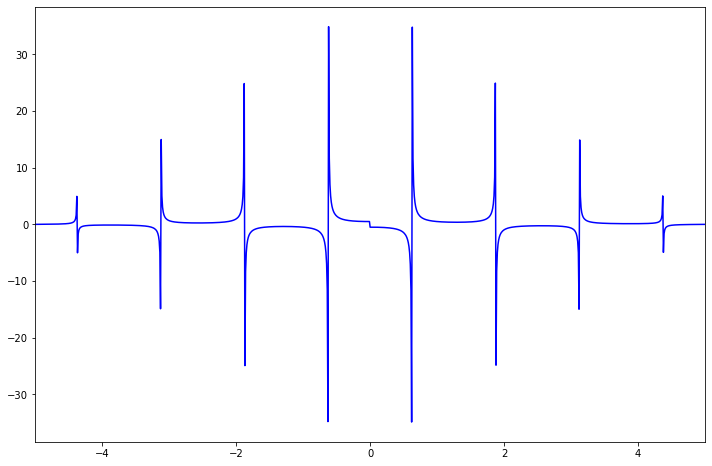

In [5]:
res2 = sp.fftpack.fftfreq(len(x), x)
plt.figure(figsize=(12,8))
plt.plot(t,res2,'b')
plt.xlim(tmin,tmax)
plt.show()

#### La magie (ou galère, c'est selon) de `fftshift`

Si vous êtes allé lire la documentation de [`sp.fftpack.fftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html) (sinon, faites le maintenant !), vous avez sans doute remarqué un comportement étrange à première vue : elle renvoie les fréquences discrètes positives dans la première moitié du vecteur, et les fréquences négatives ensuite. 

Cela vient du faire que $X(-\nu) = \overline{X(\nu)}$ pour un signal $x$ à valeurs réelles. Autrement dit, la valeur de la TFD pour les fréquences discrètes négatives se déduit des fréquences positives en prenant le conjugué. On ne peut donc garder que $X[\nu]$ pour $\nu \geq 0$ puisque les valeurs de $X$ pour $\nu < 0$ s'en déduisent immédiatement, permettant ainsi de ne stocker que la moitié des valeurs de la TFD. 

Cependant, lorsque l'on souhaite tracer le spectre $\vert X \vert $ de la TFD d'un signal, on se ramène à un ordre logique $[\nu < 0, 0, \nu > 0]$ pour le vecteur de fréquence discrètes. Il conviendra donc d'utiliser [`sp.fftpack.fftshift`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html) **sur le vecteur de fréquences discrètes** (pour ramener la fréquence nulle au centre de ce vecteur et non en première position) **ainsi que sur la TFD** (pour que les valeurs $X[\nu_k]$ coïncident bien avec l'ordre des fréquences discrètes). 

On fera également attention à bien appliquer l'opération inverse `sp.fftpack.ifftshift` si on veut inverser une transformée de Fourier (après une opération de filtrage par exemple) sur laquelle `sp.fftpack.fftshift` avait été appliquée

<font color="blue"> **Question** affichez les 10 premières valeurs du vecteur de fréquences discrètes calculé à la question précédente sans et avec application de `fftshift`, et vérifiez le bon comportement de cette fonction</font>

Python pro tip : pas besoin de boucle pour afficher les $N$ premières valeurs d'un vecteur $x$, il suffit de faire `x[:N]`

In [12]:
A = x[:10]
B = sp.fftpack.ifftshift(A)
B

array([0.9921147 , 0.98865174, 0.98456433, 0.97985505, 0.97452687,
       1.        , 0.99968419, 0.99873696, 0.9971589 , 0.99495102])

#### Normalisation de la TFD

Un petit mot également à propos des coefficients de normalisation pour le calcul de la TFD directe (2) et TFD inverse (3). Le fait que la TFD inverse porte un facteur $\frac{1}{N}$ n'est ni une convention universelle (quoique la plus répandue), ni une obligation. Par contre, le produit des facteurs de normalisation de la TFD directe et TFD inverse doit être égal à $\frac{1}{N}$ : on peut donc normaliser (2) par $\frac{1}{N}$ si on utilise un coefficient $1$ devant la TFD inverse (3), ou utiliser $\frac{1}{\sqrt{N}}$ devant (2) et (3).

Par défaut, c'est la TFD inverse qui porte le $\frac{1}{N}$ dans `scipy` (se reporter à [`scipy.fftpack.ifft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft)), mais on peut évidemment utiliser une autre normalisation à la main (par exemple, en divisant par $N$ le résultat de `scipy.fftpack.fft` et en multipliant par $N$ celui de `scipy.fftpack.ifft`).

Dans tous les cas, si `scipy.fftpack.ifft(scipy.fftpack.fft(x))` n'est pas égal à `x` à quelques imprécisions numériques près, c'est qu'on a planté quelque chose, quelque part.

<font color="blue"> **Question** Vérifiez qu'on retombe bien sur $x$ lorsqu'on applique la TFD inverse de la TFD de $x$ avec la normalisation classique de `scipy`, et en changeant la normalisation avec le $\frac{1}{N}$ sur la TFD directe. </font>

Python pro tip : [`np.allclose`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) permet de tester $x \simeq y$ à une tolérance près 

In [7]:
# TODO

### Les vrais galères du traitement numérique du signal

Quand on se rend compte qu'on pensait avoir tout compris, et qu'en fait, non...

Par défaut, la TFD d'un signal $x$ de longueur $N$ se calcule sur $N$ points (donc sur $N$ fréquences discrètes, donc un pas en fréquence de $\frac{f_e}{N}$).

Cependant, il est possible de faire le calcul sur un plus grand nombre $M > N$ de points (on appelle ça le **sur-échantillonnage de la TFD**). Dans ce cas, on a évidemment $M$ fréquences discrètes, et le pas en fréquence passe à $\frac{f_e}{M} < \frac{f_e}{N}$. Les fréquences réduites sont plus rapprochées : la résolution de la TFD augmente. Alors, pourquoi s'en priver ?

<font color = "blue"> **Question** reprenez le signal cosinus (avec toujours un nombre entier de périodes sur la durée d'observation du signal), calculez sa TFD et ses fréquences discrètes sur $2$ fois plus de points, puis affichez son spectre. Que remarquez-vous ?  Que pouvez-vous dire du nouveau pas en fréquence des fréquences discrètes ? Même question sur $5$ fois plus de points </font>

In [8]:
# TODO

<font color = "blue"> **Question** reprenez le signal cosinus, mais définissez cette fois-ci sa période $T$ pour ne pas en avoir un nombre entier sur la durée d'observation du signal (par exemple $T = 3$). Calculez et affichez sa TFD (de nouveau sans sur-échantillonnage). Que remarquez-vous ? Faites ensuite de même avec différentes valeurs de sur-échantillonnage. </font>

In [9]:
# TODO

<font color="blue"> **Question** Les deux observations précédentes, à savoir l'apparition d'un sinus cardinal dans le spectre là où on aurait plutôt attendu un Dirac sont causés par le même phénomène. Pouvez-vous identifier lequel ? (indice: un signal numérique, donc de longueur finie, peut se modéliser comme un signal théorique infini multiplié par une porte de largeur égale à la fenêtre d'observation...)</font>

In [10]:
# TODO

<font color="blue"> **Question bonus** Définissez maintenant un signal comme étant la somme de deux cosinus et d'un sinus de différentes amplitudes et fréquences propres : $x(t) = A_1 \cos(2 \pi \nu_1 t) + A_2 \cos(2 \pi \nu_2 t) + A_3 \sin(2 \pi \nu_3 t)$ et calculez la transformée de Fourier. Visualisez la partie réelle, la partie imaginaire et le spectre de cette TFD ? Est-ce conforme à ce que vous attendiez ?</font>

In [11]:
# TODO-bonus